In [1]:
import os
import time
import numpy as np
import matplotlib.pyplot as plt 
import sys
import torch
import torch.optim as optim
import torch.nn as nn
from dip import EncDec
from utils import imread

import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F

In [32]:
# class EncDec(nn.Module):
#     def __init__(self):
#         super(EncDec, self).__init__()
#         self.bn16 = nn.BatchNorm2d(16)
#         self.bn32 = nn.BatchNorm2d(32)
#         self.bn64 = nn.BatchNorm2d(64)
#         self.bn128 = nn.BatchNorm2d(128)
#         self.bn256 = nn.BatchNorm2d(256)
        
#         self.conv1 = nn.Conv2d(1, 16, 3, 2, 1) # Encoder - 1
#         self.conv2 = nn.Conv2d(16, 32, 3, 2, 1) # Encoder - 2
#         self.conv3 = nn.Conv2d(32, 64, 3, 2, 1) # Encoder - 3 
#         #self.conv4 = nn.Conv2d(64, 128, 3, 2, 1) # Encoder - 4 
#         #self.conv5 = nn.Conv2d(128, 256, 3, 2, 1) # Encoder - 5 
#         self.upsample = nn.Upsample(scale_factor=2, mode='bilinear') #, align_corners=True
#         #self.conv5_t = nn.Conv2d(256, 256, 3, 1, 1) # Decoder - 5 
#         #self.conv4_t = nn.Conv2d(128, 128, 3, 1, 1) # Decoder - 4 
#         self.conv3_t = nn.Conv2d(64, 64, 3, 1, 1) # Decoder - 3
#         self.conv2_t = nn.Conv2d(64, 32, 3, 1, 1) # Decoder - 2
#         self.conv1_t = nn.Conv2d(32, 16, 3, 1, 1) # Decoder - 1
#         self.conv0_t = nn.Conv2d(16, 1, 3, 1, 1) # Final Decoder
        
#     def forward(self, x):
#         out = F.relu(self.bn16(self.conv1(x)))
#         out = F.relu(self.bn32(self.conv2(out)))
#         out = F.relu(self.bn64(self.conv3(out)))
#         out = F.relu(self.bn64(self.conv3_t(self.upsample(out))))
#         out = F.relu(self.bn32(self.conv2_t(self.upsample(out))))
#         out = F.relu(self.bn16(self.conv1_t(self.upsample(out))))
#         #out = F.relu((self.conv1_t(self.upsample(out))))
#         out = F.relu(self.conv0_t(out))
#         return out

In [64]:
# class EncDec(nn.Module):
#     def __init__(self):
#         super(EncDec, self).__init__()
#         self.bn16 = nn.BatchNorm2d(16)
#         self.bn32 = nn.BatchNorm2d(32)
#         self.bn64 = nn.BatchNorm2d(64)
#         self.pool1 = nn.MaxPool2d(2)
        
#         self.conv1 = nn.Conv2d(1, 16, 3, 2, 1) # Encoder - 2 
#         self.conv2 = nn.Conv2d(16, 32, 3, 2, 1) # Encoder - 2 
#         self.conv3 = nn.Conv2d(32, 64, 3, 2, 1) # Encoder - 2 
#         self.upsample = nn.Upsample(scale_factor=2, mode='bilinear',  align_corners=True)
#         self.conv3_t = nn.Conv2d(64, 32, 3, 1, 1) # Decoder - 3
#         self.conv2_t = nn.Conv2d(32, 16, 3, 1, 1) # Decoder - 3
#         self.conv1_t = nn.Conv2d(16, 1, 3, 1, 1) # Decoder - 1
        
#     def forward(self, x):
#         out = F.relu(self.conv1(x))
#         out = self.bn32((F.relu(self.conv2(out))))
#         out = self.bn64(F.relu(self.conv3(out)))
        
#         out = self.bn32(F.relu(self.conv3_t(self.upsample(out))))
#         out = self.bn16(F.relu(self.conv2_t(self.upsample(out))))
#         out = self.conv1_t(self.upsample(out))
        
#         return (out)

In [74]:
class EncDec(nn.Module):
    def __init__(self):
        super(EncDec, self).__init__()
        self.bn16 = nn.BatchNorm2d(16)
        self.bn32 = nn.BatchNorm2d(32)
        self.bn64 = nn.BatchNorm2d(64)
        self.bn128 = nn.BatchNorm2d(128)
        self.bn256 = nn.BatchNorm2d(256)
        
        self.conv1 = nn.Conv2d(1, 16, 3, 2, 1) # Encoder - 1
        self.conv2 = nn.Conv2d(16, 32, 3, 2, 1) # Encoder - 2
        self.conv3 = nn.Conv2d(32, 64, 3, 2, 1) # Encoder - 3 
        self.conv4 = nn.Conv2d(64, 128, 3, 2, 1) # Encoder - 4
        self.conv5 = nn.Conv2d(128, 256, 3, 2, 1) # Encoder - 5
        
        self.upsample = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)
        
        self.conv5_t = nn.Conv2d(256, 256, 3, 1, 1) # Decoder - 5
        self.conv4_t = nn.Conv2d(256, 128, 3, 1, 1) # Decoder - 4
        self.conv3_t = nn.Conv2d(128, 64, 3, 1, 1) # Decoder - 3
        self.conv2_t = nn.Conv2d(64, 32, 3, 1, 1) # Decoder - 2
        self.conv1_t = nn.Conv2d(32, 16, 3, 1, 1) # Decoder - 1
        self.conv0_t = nn.Conv2d(16, 1, 3, 1, 1) # Final Decoder
        
    def forward(self, x):
        out = (F.relu(self.conv1(x)))
        out = self.bn32(F.relu(self.conv2(out)))
        out = self.bn64(F.relu(self.conv3(out)))
        out = self.bn128(F.relu(self.conv4(out)))
        out = self.bn256(F.relu(self.conv5(out)))
        out = self.upsample(self.bn256(F.relu(self.conv5_t(out))))
        out = self.upsample(self.bn128(F.relu(self.conv4_t(out))))
        out = self.upsample(self.bn64(F.relu(self.conv3_t(out))))
        out = self.upsample(self.bn32(F.relu(self.conv2_t(out))))
        out = self.upsample(self.bn16(F.relu(self.conv1_t(out))))
        out = torch.tanh(self.conv0_t(out))
        return out

In [75]:
file = 'saturn'
im = imread('../data/denoising/{}.png'.format(file))
noise = imread('../data/denoising/{}-noisy.png'.format(file))
noisy_img = torch.FloatTensor(noise).unsqueeze(0).unsqueeze(0).transpose(2, 3)
clean_img = torch.FloatTensor(im).unsqueeze(0).unsqueeze(0).transpose(2,3)

MAX_EPOCHS = 5000

#for i in range(10):
net = EncDec()
criterion, optimizer = nn.MSELoss(), optim.Adam(net.parameters(), lr=0.01)
eta = torch.randn(*noisy_img.size())

for itr in range(MAX_EPOCHS+1):
    out = net(eta)
    optimizer.zero_grad()
    loss = criterion(out, clean_img)
    loss.backward()
    optimizer.step()

    if itr %100 == 0:
        op_img = net(eta)[0, 0, :, :].transpose(0,1).detach().numpy()
        error = ((op_img - noise)**2).sum()
        print ("Loss = %.4f" % error)
print ('----------')

Loss = 18711.5356
Loss = 667.2170
Loss = 534.7826
Loss = 514.0365
Loss = 469.2460
Loss = 466.1514
Loss = 436.8802
Loss = 471.0356
Loss = 421.2534
Loss = 405.1002
Loss = 401.9221
Loss = 414.8923
Loss = 399.1823
Loss = 403.8143
Loss = 390.6147
Loss = 436.3732
Loss = 387.7196
Loss = 385.2263
Loss = 377.4074
Loss = 385.5165
Loss = 410.3562


KeyboardInterrupt: 

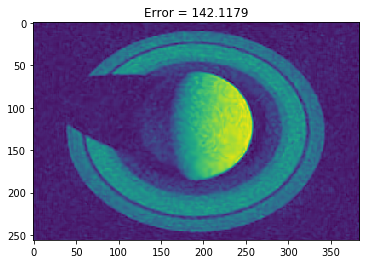

In [66]:
out_img = out[0, 0, :, :].transpose(0,1).detach().numpy()
curr_error = ((im - out_img)**2).sum()
plt.title('Error = %.4f' % curr_error )
plt.imshow(out_img)
plt.show()

In [ ]:
# Loss = 11261.9091
# Loss = 420.9516
# Loss = 362.1442
# Loss = 329.2010
# Loss = 305.1581
# Loss = 298.7935
# Loss = 284.5215
# Loss = 267.2838
# Loss = 269.9357
# Loss = 257.6491
# Loss = 246.8981
# Loss = 243.7250
# Loss = 244.7198
# Loss = 275.9107
# Loss = 225.4708
# Loss = 222.5621
# Loss = 247.0702
# Loss = 226.8717
# Loss = 225.2267
# Loss = 228.3397
# Loss = 211.2814
# Loss = 211.1364
# Loss = 216.8816
# Loss = 231.8218
# Loss = 199.5969
# Loss = 254.7612
# Loss = 220.0014
# Loss = 217.3059
# Loss = 213.3318
# Loss = 228.9521
# Loss = 246.9063
# Loss = 184.2800
# Loss = 189.4238
# Loss = 197.4865
# Loss = 198.8457
# Loss = 187.2514
# Loss = 188.5217
# Loss = 177.4614
# Loss = 215.7248
# Loss = 227.2599
# Loss = 172.6333
# Loss = 172.3062
# Loss = 170.8042
# Loss = 226.2333
# Loss = 161.8723
# Loss = 170.7888
# Loss = 168.7833
# Loss = 179.1294
# Loss = 177.1836
# Loss = 161.1891
# Loss = 163.9743

In [20]:
# file = 'saturn'
# im = imread('../data/denoising/{}.png'.format(file))
# noise = imread('../data/denoising/{}-noisy.png'.format(file))
# noisy_img = torch.FloatTensor(noise).unsqueeze(0).unsqueeze(0).transpose(2, 3)
# clean_img = torch.FloatTensor(im).unsqueeze(0).unsqueeze(0).transpose(2,3)

# MAX_EPOCHS = 500

# for i in range(10):
#     net = EncDec()
#     criterion, optimizer = nn.MSELoss(), optim.Adam(net.parameters(), lr=0.01)
#     eta = torch.randn(*noisy_img.size())

#     for itr in range(MAX_EPOCHS+1):
#         out = net(eta)
#         optimizer.zero_grad()
#         loss = criterion(out, noisy_img)
#         loss.backward()
#         optimizer.step()

#         if itr %100 == 0:
#             op_img = net(eta)[0, 0, :, :].transpose(0,1).detach().numpy()
#             error = ((op_img - noise)**2).sum()
#             print ("Loss = %.4f" % error)
#     print ('----------')

Loss = 19504.2374
Loss = 644.5325
Loss = 502.0688
Loss = 456.4571
Loss = 458.2902
Loss = 424.2570
----------
Loss = 17941.8631
Loss = 652.6826
Loss = 489.0270
Loss = 432.1120
Loss = 399.4287
Loss = 381.0613
----------
Loss = 16838.1054
Loss = 601.7692
Loss = 474.1391
Loss = 428.6640
Loss = 408.2689
Loss = 386.6358
----------
Loss = 24984.2480
Loss = 805.0478
Loss = 496.1331
Loss = 488.4484
Loss = 455.1447
Loss = 407.8287
----------
Loss = 14960.3022
Loss = 600.9340
Loss = 492.2486
Loss = 425.1483
Loss = 447.2391
Loss = 378.3235
----------
Loss = 14293.5522
Loss = 579.2758
Loss = 458.1322
Loss = 426.9587
Loss = 417.7295
Loss = 403.1266
----------
Loss = 17786.5038
Loss = 574.5971
Loss = 477.1643
Loss = 423.8214
Loss = 405.8097
Loss = 409.0194
----------
Loss = 27437.1153
Loss = 1410.4918
Loss = 502.5340
Loss = 460.8185
Loss = 417.7242
Loss = 397.9728
----------
Loss = 10843.9009
Loss = 624.6598
Loss = 471.1763
Loss = 424.7400
Loss = 449.7186
Loss = 383.6914
----------
Loss = 11119.5403


KeyboardInterrupt: 

In [15]:
file = 'lena'
im = imread('../data/denoising/{}.png'.format(file))
noise = imread('../data/denoising/{}-noisy.png'.format(file))
noisy_img = torch.FloatTensor(noise).unsqueeze(0).unsqueeze(0).transpose(2, 3)
clean_img = torch.FloatTensor(im).unsqueeze(0).unsqueeze(0).transpose(2,3)

MAX_EPOCHS = 500

for i in range(10):
    net = EncDec()
    criterion, optimizer = nn.MSELoss(), optim.Adam(net.parameters(), lr=0.01)
    eta = torch.randn(*noisy_img.size())

    for itr in range(MAX_EPOCHS+1):
        out = net(eta)
        optimizer.zero_grad()
        loss = criterion(out, noisy_img)
        loss.backward()
        optimizer.step()

        if itr %100 == 0:
            op_img = net(eta)[0, 0, :, :].transpose(0,1).detach().numpy()
            error = ((op_img - noise)**2).sum()
            print ("Loss = %.4f" % error)
    print ('----------')

Loss = 13304.7616
Loss = 762.8746
Loss = 637.6743
Loss = 556.6402
Loss = 544.6114
Loss = 512.4421
----------
Loss = 6687.2771
Loss = 688.0491
Loss = 545.1859
Loss = 597.2532
Loss = 458.8132
Loss = 444.5073
----------
Loss = 12208.6532
Loss = 705.3767


KeyboardInterrupt: 

In [13]:
file = 'lena'
im = imread('../data/denoising/{}.png'.format(file))
noise = imread('../data/denoising/{}-noisy.png'.format(file))
noisy_img = torch.FloatTensor(noise).unsqueeze(0).unsqueeze(0).transpose(2, 3)
clean_img = torch.FloatTensor(im).unsqueeze(0).unsqueeze(0).transpose(2,3)

MAX_EPOCHS = 500
net = EncDec()
criterion, optimizer = nn.MSELoss(), optim.Adam(net.parameters(), lr=0.01)
eta = torch.randn(*noisy_img.size())

for itr in range(MAX_EPOCHS+1):
    out = net(eta)
    optimizer.zero_grad()
    loss = criterion(out, noisy_img)
    loss.backward()
    optimizer.step()
    
    if itr %100 == 0:
        op_img = net(eta)[0, 0, :, :].transpose(0,1).detach().numpy()
        error = ((op_img - noise)**2).sum()
        print ("Loss = %.4f" % error)

Loss = 9294.7817
Loss = 653.7874
Loss = 544.7261
Loss = 485.5791
Loss = 486.1739
Loss = 452.8942


In [ ]:
op_img = net(eta)[0, 0, :, :].transpose(0,1).detach().numpy()
error = ((op_img - noise)**2).sum()
print ("Loss = %.4f" % error)

In [ ]:
def get_run_accuracy(noisy_img, clean_img, file, lr, MAX_EPOCHS):
    net = EncDec()
    criterion, optimizer = nn.MSELoss(), optim.Adam(net.parameters(), lr=0.001)
    eta = torch.randn(*noisy_img.size())
    training_error, testing_error, runtime_stats = np.zeros((MAX_EPOCHS)), np.zeros((MAX_EPOCHS)), {}
    
    #noise_img = net(noisy_img)[0, 0, :, :].transpose(0,1).detach().numpy()
    
    for itr in range(MAX_EPOCHS):
        out = net(eta)
        optimizer.zero_grad()
        loss = criterion(out, noisy_img)
        loss.backward()
        optimizer.step()
        op_img = out[0, 0, :, :].transpose(0,1).detach().numpy()
        
        
        training_error[itr] = ((op_img - noise_img)**2).sum()
        testing_error[itr] = ((im - op_img)**2).sum()
    
    runtime_stats['{}_train'.format(file)], runtime_stats['{}_test'.format(file)] = training_error, testing_error
    runtime_stats['model'] = net
    runtime_stats['eta'] = eta
    return runtime_stats

def cross_validated_best_accuracy(noisy_img, clean_img, file, lr, MAX_EPOCHS, MAX_TRIAL, DESIRED_LOSS=-1):
    best_loss, best_stats = 1e5, -1
    for trial in range(MAX_TRIAL):
        collect_stats = get_run_accuracy(noisy_img, clean_img, file, lr, MAX_EPOCHS)
        print ("Current Loss = {}".format(collect_stats['%s_test' % file][-1]))
        if collect_stats['%s_test' % file][-1] < best_loss:
            best_loss, best_stats = collect_stats['%s_test' % file][-1], collect_stats
            print ("Current Best Loss = {}".format(best_loss))  
            
        # Early stopping at desired value
        if DESIRED_LOSS != -1 and best_loss < DESIRED_LOSS:
            return best_stats
    return best_stats